# Simulate Earth's core

In [1]:
import sys
sys.path.insert(0, '../src')
from eostable import *
from planet_func import integrate_with_atmos, Planet
from utils import guess_history, eos_tables
from read_EOS import read_EOS_Si
import os, time, pickle
import pandas as pd

In [2]:
data_folder = "DirEOS2019"
H_filename = "TABLE_H_TP_v1"
He_filename = "TABLE_HE_TP_v1"
HHe_filename = "TABLEEOS_HHE_TP_Y0.275_v1"
Si_filename = '../EOS_Si.pkl'


# read table from folder
EOS = eos_tables()
EOS_H = pd.read_csv("../EOS_tables/EOS_H.csv")
EOS_He = pd.read_csv("../EOS_tables/EOS_He.csv")
EOS_HHe = pd.read_csv("../EOS_tables/EOS_HHe.csv")
NewEOS = read_EOS_Si(Si_filename)

EOS.set_gas_table(EOS_H, EOS_He, EOS_HHe, NewEOS)

In [3]:
##### test case
M_core=6e24 * 1
f=0           # mass fraction of dissolved gas
f_He=0        # mass fraction of Helium for the gas
f_M=0.325     # mass fraction of metal for the core

R_guess =  6371000  # initial guess for the radius (unit in m)
dr_coeff = 0.005          # precision of each step during the integration

T_eff=1600              # temperature at the core-envelope boundary (unit in K)
P_eff = 1e8             # pressure at the core-envelope boundary (unit in Pa)

X = 0
X_He = 0

new_planet = Planet(M_core, f_M, X, X_He)
new_planet.set_f_fHe(f, f_He)
setattr(new_planet, "P_eff", P_eff)
setattr(new_planet, "T_eff", T_eff)

R_guess_history = guess_history()
R_guess_max = None
R_guess_min = None

results = integrate_with_atmos(new_planet, R_guess, dr_coeff, EOS, 
                               R_guess_history, R_guess_max, R_guess_min, 
                               fugacity=False)

T_EC = 1600.04 K, P_EC = 0.10 GPa
M_error / M_core: 9.53%

new_R_guess: 3.162 R_E
T_EC = 1599.93 K, P_EC = 0.10 GPa
M_error / M_core: -4608.94%

new_R_guess: 1.778 R_E
T_EC = 1600.00 K, P_EC = 0.10 GPa
M_error / M_core: -678.97%

new_R_guess: 1.334 R_E
T_EC = 1600.02 K, P_EC = 0.10 GPa
M_error / M_core: -185.65%

new_R_guess: 1.155 R_E
T_EC = 1600.03 K, P_EC = 0.10 GPa
M_error / M_core: -63.79%

new_R_guess: 1.075 R_E
T_EC = 1600.04 K, P_EC = 0.10 GPa
M_error / M_core: -22.15%

new_R_guess: 1.037 R_E
T_EC = 1600.04 K, P_EC = 0.10 GPa
M_error / M_core: -5.21%

new_R_guess: 1.018 R_E
T_EC = 1600.04 K, P_EC = 0.10 GPa
M_error / M_core: 2.34%

new_R_guess: 1.027 R_E
T_EC = 1600.04 K, P_EC = 0.10 GPa
M_error / M_core: -1.36%

new_R_guess: 1.023 R_E
T_EC = 1600.04 K, P_EC = 0.10 GPa
M_error / M_core: 0.50%
Congratulations! The itration is successful! :)


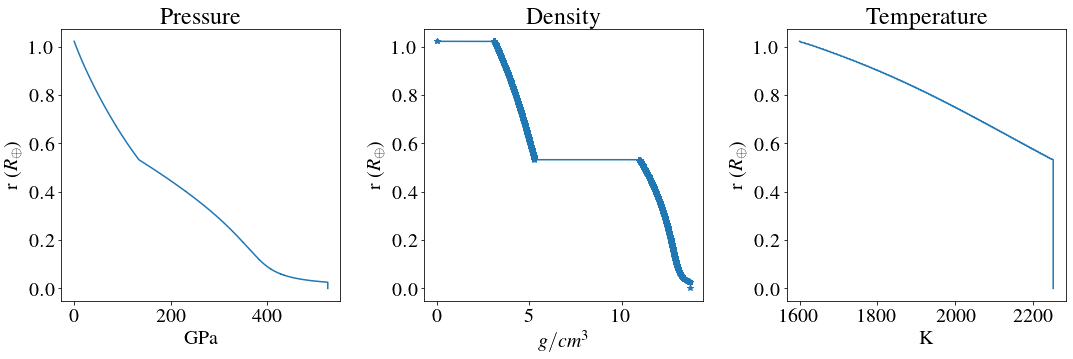

In [4]:
from make_plot import plot_profile

plot_profile(new_planet, 'All')